In [1]:
library(ggplot2)
library(knitr)

### Exercise 1: Bayesian Inference for Poisson model

The number of particles emitted by a radioactive source during a fixed interval of time  
($\Delta t = 10\ s$) follows a Poisson distribution on the parameter $\mu$. The number of particles  
observed during consecutive time intervals is: 4, 1, 3, 1, 5 and 3.

a) assuming a positive uniform priori distributiuon for the parameter $\mu$

- determine and draw the posterior distribution for $\mu$, given the data

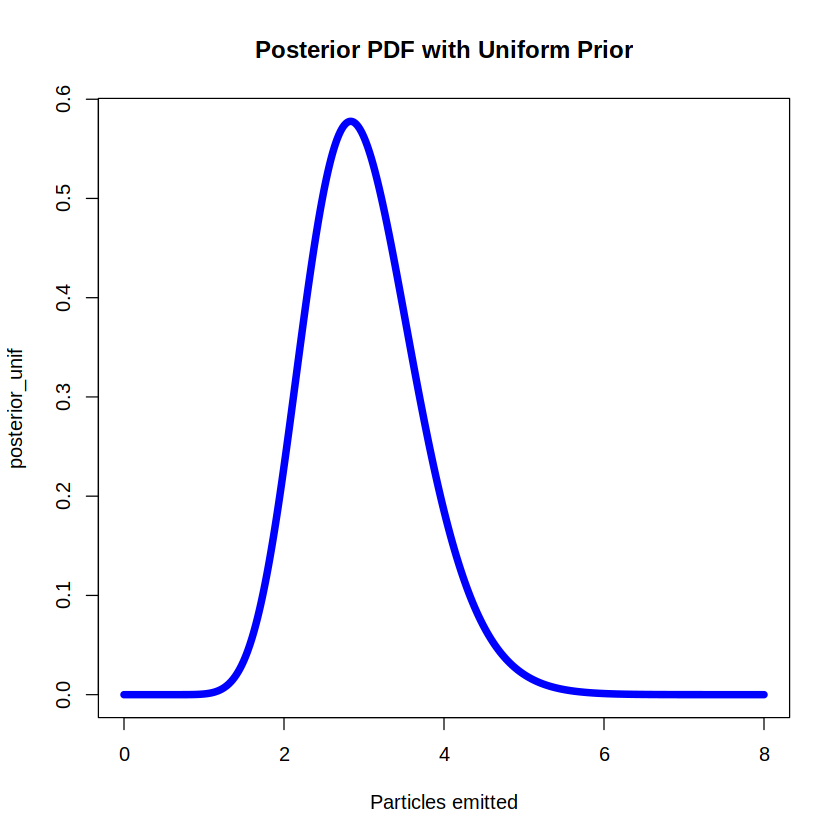

In [2]:
#for a poisson model and a prior uniform distribution, the posterior is a gamma distribution (calculated with the bayes' theorem).
#having this info we can calculate alpha and beta for the gamma distribution.

alpha_prior = 1
beta_prior = 0

data = c(4,1,3,1,5,3)
alpha_a = sum(data) + alpha_prior
beta_a = length(data) + beta_prior

mu = seq(0,8,length=10000)
posterior_unif = dgamma(mu, alpha_a, beta_a)

plot(mu, 
     posterior_unif, 
     type = "l",
     lwd = 6,
     main = "Posterior PDF with Uniform Prior",
     xlab = "Particles emitted",
     col = "blue")

- evaluate mean, median and variance, both analytically and numerically in R

In [3]:
#analitycally i can comput the mean and variance using alpha and beta. i can approximate the median too
posterior_unif_norm = posterior_unif / sum(posterior_unif)

anal_mean_a = alpha_a / beta_a
anal_median = alpha_a^(1/3) * (1 - 1/(9*alpha_a) - 0.2/alpha_a)^3
anal_var_a = alpha_a/(beta_a^2)

num_mean = sum(mu * posterior_unif_norm)
num_median = qgamma(0.5, alpha_a, beta_a)
num_var = sum((mu - num_mean)^2 * posterior_unif_norm)

results_df = data.frame(
  Type = c("Analytical", "Numerical"),
  Mean = c(anal_mean_a, num_mean),
  Median = c(anal_median, num_median),
  Variance = c(anal_var_a, num_var)
)

print(results_df)

        Type     Mean   Median  Variance
1 Analytical 3.000000 2.487186 0.5000000
2  Numerical 2.999999 2.944631 0.4999937


b) assuming a Gamma prior such that the expected value is $\mu = 3$ with a standard deviation $\sigma = 1$

- determine and draw the posterior distribution for $\mu$, given the data

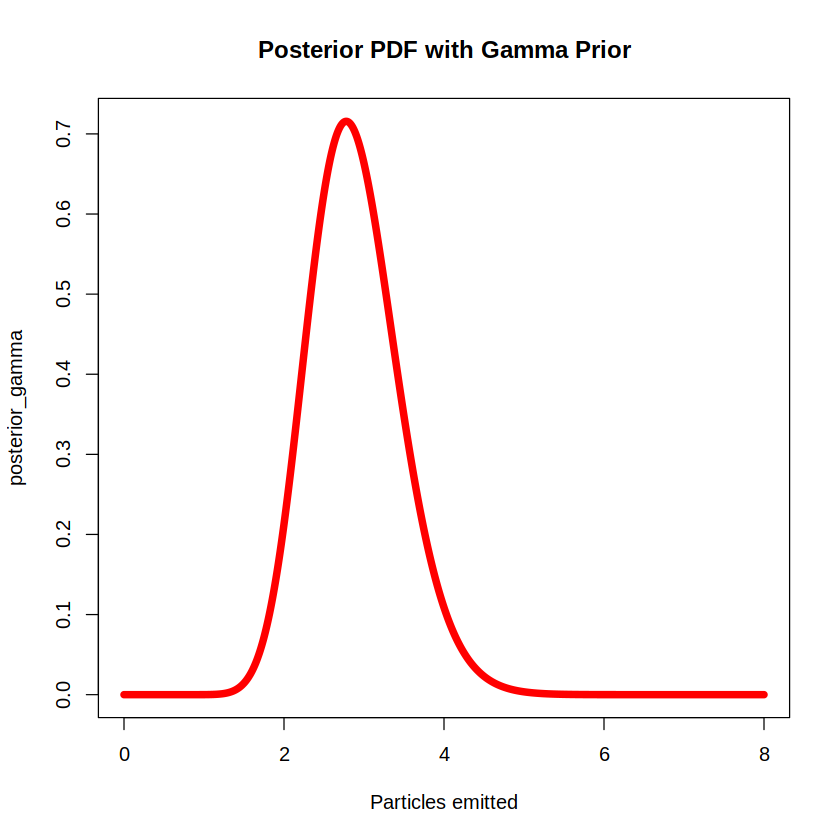

In [4]:
expected_mu = 3
sigma = 1

alpha_b = expected_mu^2 / sigma^2
beta_b = expected_mu / sigma^2

alpha_post_b = alpha_b + sum(data)
beta_post_b = beta_b + length(data)

posterior_gamma = dgamma(mu, alpha_post_b, beta_post_b)
posterior_gamma_norm = posterior_gamma / sum(posterior_gamma)

plot(mu, 
     posterior_gamma, 
     type = "l",
     lwd = 6,
     main = "Posterior PDF with Gamma Prior",
     xlab = "Particles emitted",
     col = "red")

- evaluate mean, median and variance, both analytically and numerically in R

In [5]:
anal_mean_b = alpha_post_b / beta_post_b
anal_median = alpha_post_b^(1/3) * (1 - 1/(9*alpha_post_b) - 0.2/alpha_post_b)^3
anal_var_b = alpha_post_b/(beta_post_b^2)

num_mean = sum(mu * posterior_gamma_norm)
num_median = qgamma(0.5, alpha_post_b, beta_post_b)
num_var = sum((mu - num_mean)^2 * posterior_gamma_norm)

results_df = data.frame(
  Type = c("Analytical", "Numerical"),
  Mean = c(anal_mean_b, num_mean),
  Median = c(anal_median, num_median),
  Variance = c(anal_var_b, num_var)
)

print(results_df)

        Type     Mean   Median  Variance
1 Analytical 2.888889 2.857417 0.3209877
2  Numerical 2.888889 2.851937 0.3209877


c) evaluate a 95% credibility interval for the result obtained with different priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation

In [6]:
ci_gamma_a <- qgamma(c(0.025, 0.975), alpha_a, beta_a)
ci_gamma_b <- qgamma(c(0.025, 0.975), alpha_post_b, beta_post_b)

normal_a <- qnorm(c(0.025, 0.975), mean=anal_mean_a, sd=sqrt(anal_var_a))
normal_b <- qnorm(c(0.025, 0.975), mean=anal_mean_b, sd=sqrt(anal_var_b))

results_comparison <- data.frame(
  Prior = c("Uniform Prior", "Normal approx", "Gamma prior", "Normal Approx"),
  Lower_Bound = c(ci_gamma_a[1], normal_a[1], ci_gamma_b[1], normal_b[1]),
  Upper_Bound = c(ci_gamma_a[2], normal_a[2], ci_gamma_b[2], normal_b[2])
)

print(results_comparison)

          Prior Lower_Bound Upper_Bound
1 Uniform Prior    1.777990    4.536441
2 Normal approx    1.614096    4.385904
3   Gamma prior    1.887118    4.100548
4 Normal Approx    1.778456    3.999322


### Exercise 2: Efficiency using Bayesian approach 

A researcher A wants to evaluate the efficiency of detector 2 (Det2). For this purpose, he sets up the apparatus shown in the figure 1, where Det2 is sandwiched between Det1 and Det3. Let n be the number of signals recorder simultaneously by Det1 and Det3, and r be those also recorder by Det2, researcher A obtains n = 500 and r = 312.
Assuming a binomial model where n is the number of trials and r is the number of success out of n trials,

a) Evaluate the mean and the variance using a Bayesian approach under the hypothesis of:
- uniform prior $\sim$ U(0,1)
- Jeffrey's prior $\sim$ Beta(1/2,1/2)

In [7]:
n_a = 500 #number of trials (signals recorded by det1 and det3)
r_a = 312 #number of successes (signals also detected by det2)

#a uniform (U(0,1)) prior can be described by a Beta(1,1)
prior_alpha_u = 1
prior_beta_u = 1

#for a beta prior with a binomial model, the posterior is again a beta distribution. the parameters are:
post_alpha_u = prior_alpha_u + r_a
post_beta_u = prior_beta_u + (n_a-r_a)

#for the mean and variance we are gonna use alpha and beta previously calculated
mean_u = post_alpha_u / (post_alpha_u + post_beta_u)
var_u = (post_alpha_u * post_beta_u) / ((post_alpha_u + post_beta_u)^2 * (post_alpha_u + post_beta_u + 1))

#i'll do the same calculation for the jeffrey's prior
prior_alpha_j = 1/2
prior_beta_j = 1/2

post_alpha_j = prior_alpha_j + r_a
post_beta_j = prior_beta_j + (n_a-r_a)

mean_j = post_alpha_j / (post_alpha_j + post_beta_j)
var_j = (post_alpha_j * post_beta_j) / ((post_alpha_j + post_beta_j)^2 * (post_alpha_j + post_beta_j + 1))

det2 = data.frame(
  Prior = c("Uniform Prior", "Jeffrey's Prior"),
  Mean = c(mean_u, mean_j),
  Variance = c(var_u, var_j)
)

print(det2)

            Prior      Mean     Variance
1   Uniform Prior 0.6235060 0.0004666924
2 Jeffrey's Prior 0.6237525 0.0004675006


b) Plot the posterior distributions for both cases

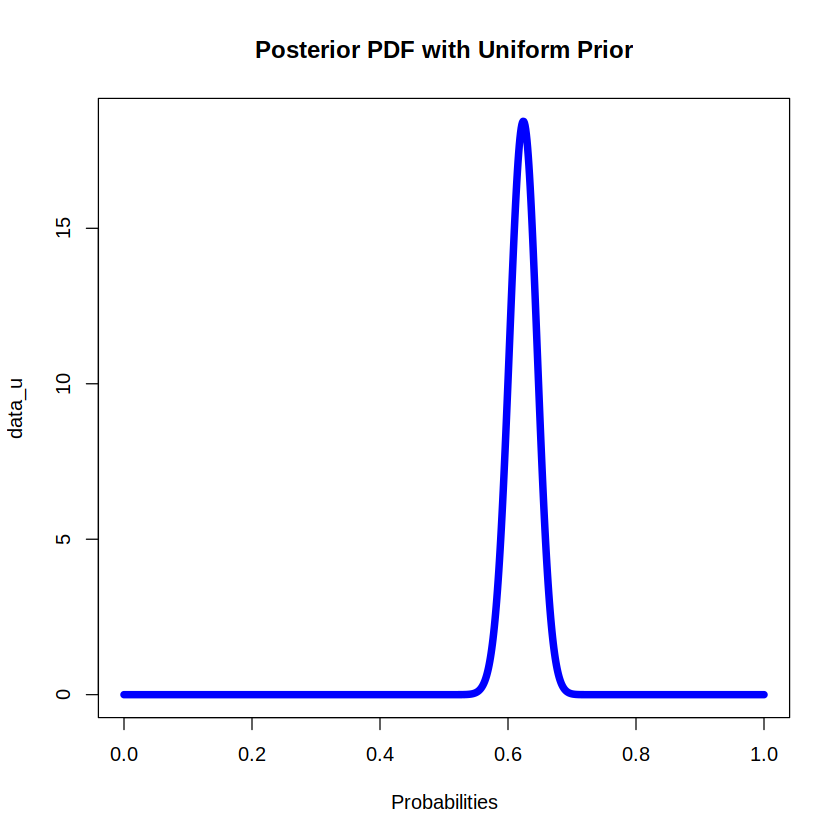

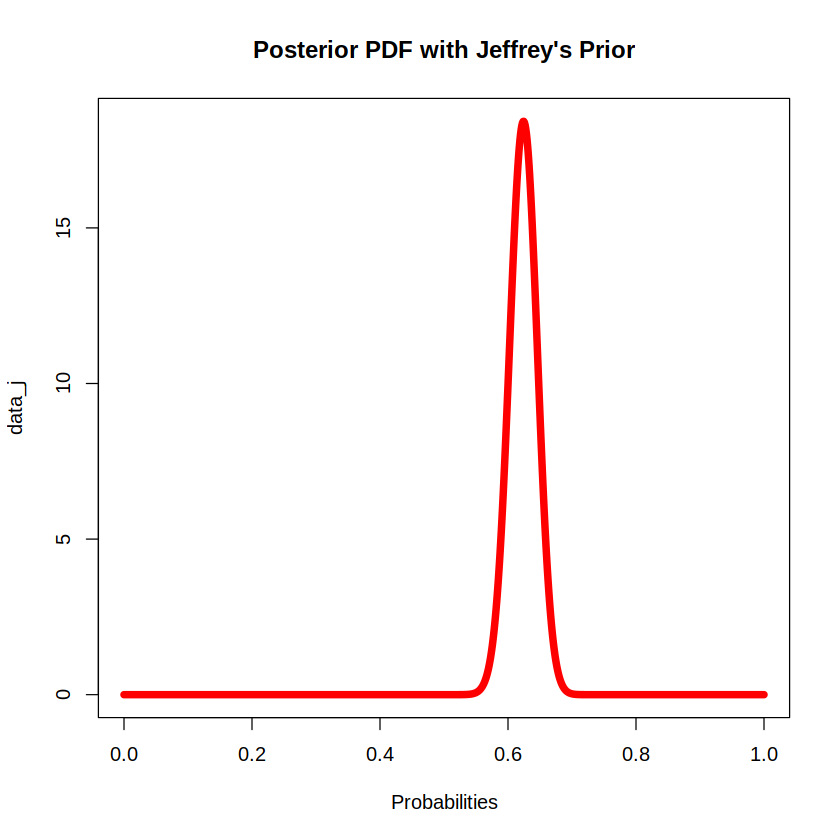

In [8]:
probabilities = seq(0,1,length=1000)

data_u = dbeta(probabilities, post_alpha_u, post_beta_u)
data_j = dbeta(probabilities, post_alpha_j, post_beta_j)

plot(probabilities, 
     data_u, 
     type = "l",
     lwd = 6,
     main = "Posterior PDF with Uniform Prior",
     xlab = "Probabilities",
     col = "blue")

plot(probabilities, 
     data_j, 
     type = "l",
     lwd = 6,
     main = "Posterior PDF with Jeffrey's Prior",
     xlab = "Probabilities",
     col = "red")

Taking into account that the same detector has been studied by researcher B, who has performed only n = 10 measurements and has obtained r = 10 signals,

c) Evaluate the mean, the variance and the posterior distribution using a uniform prior with the result of researcher B

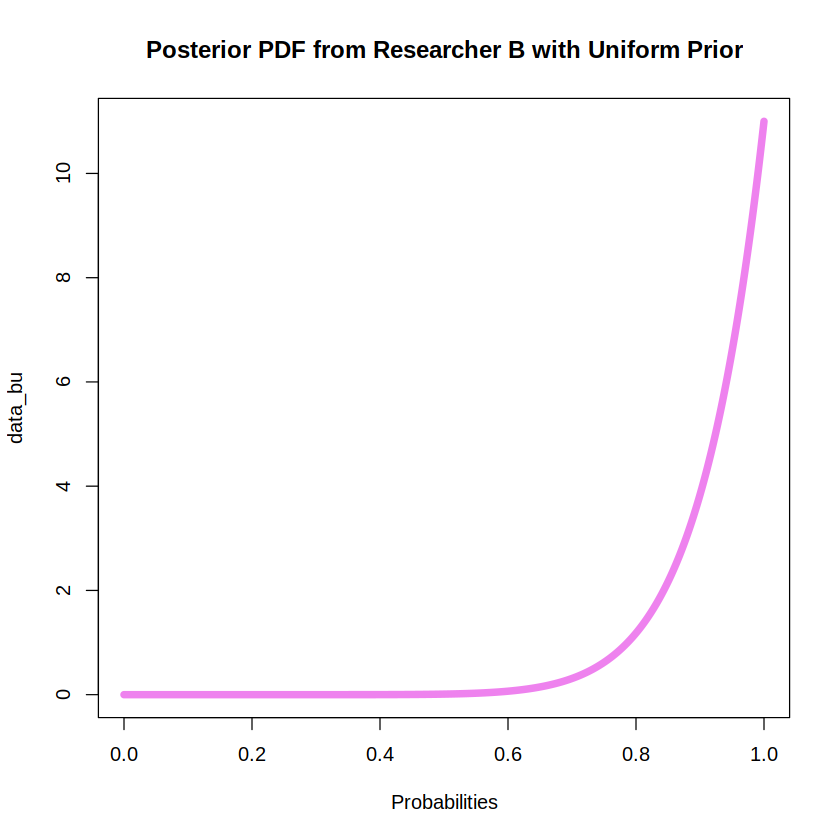

In [9]:
n_b = 10
r_b = 10

#uniform prior so beta(1,1)
prior_alpha_bu = 1
prior_beta_bu = 1

post_alpha_bu = prior_alpha_bu + r_b
post_beta_bu = prior_beta_bu + (n_b-r_b)

mean_bu = post_alpha_bu / (post_alpha_bu + post_beta_bu)
var_bu = (post_alpha_bu * post_beta_bu) / ((post_alpha_bu + post_beta_bu)^2 * (post_alpha_bu + post_beta_bu + 1))

data_bu = dbeta(probabilities, post_alpha_bu, post_beta_bu)

plot(probabilities, 
     data_bu, 
     type = "l",
     lwd = 6,
     main = "Posterior PDF from Researcher B with Uniform Prior",
     xlab = "Probabilities",
     col = "violet")

d) Repeat the computation of points a) and b) with the data of researcher A using as a prior the posterior obtained from point c)

  final_mean   final_var
1  0.6308594 0.000453949


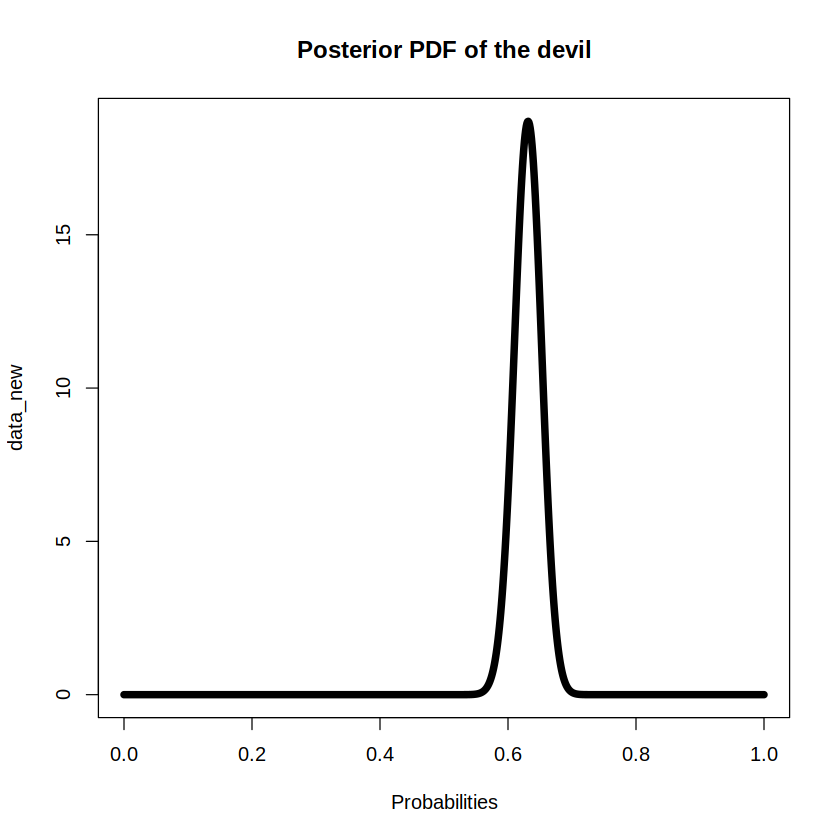

In [10]:
new_alpha_post = post_alpha_bu + r_a
new_beta_post = post_beta_bu + (n_a-r_a)

new_mean = new_alpha_post / (new_alpha_post + new_beta_post)
new_var = (new_alpha_post * new_beta_post) / ((new_alpha_post + new_beta_post)^2 * (new_alpha_post + new_beta_post + 1))

data_new = dbeta(probabilities, new_alpha_post, new_beta_post)

data_lmao = data.frame(
    final_mean = new_mean,
    final_var = new_var
)

print(data_lmao)

plot(probabilities, 
     data_new, 
     type = "l",
     lwd = 6,
     main = "Posterior PDF of the devil",
     xlab = "Probabilities",
     col = "black")

### Exercise 3 - Bayesian inference for Binomial model

A coin is flipped n = 30 times with the folloqing outcomes:
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H,
T, H, T, H, H, H

a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the dataset

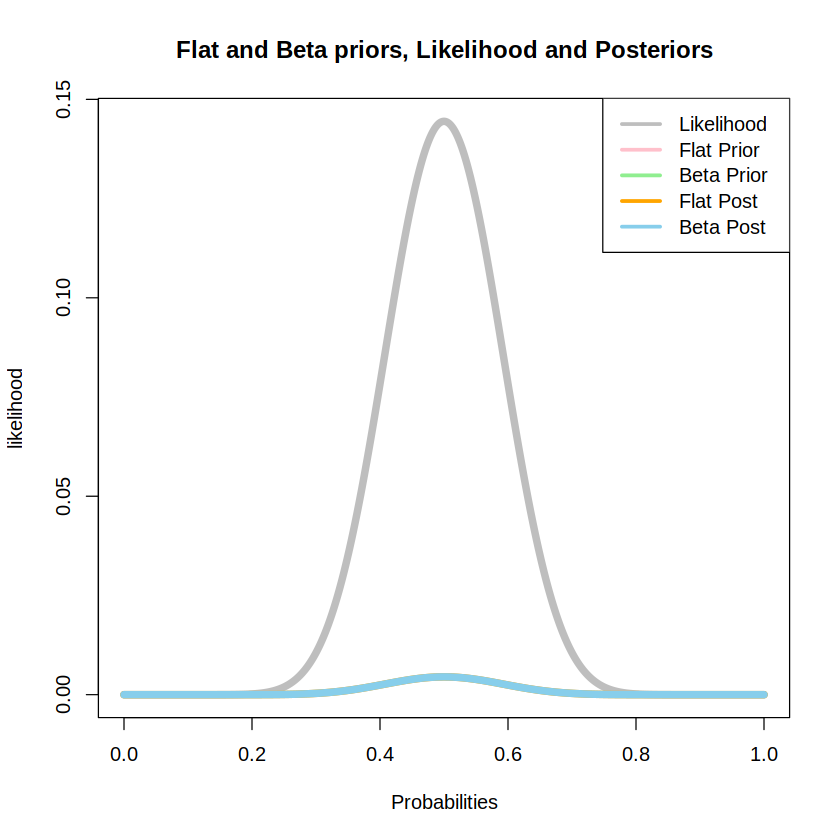

In [11]:
flips = c("T", "T", "T", "T", "T", "H", "T", "T", "H", "H", "T", "T", "H", "H", "H", "T", "H",
          "T", "H", "T", "H", "H", "T", "H", "T", "H", "T", "H", "H", "H")

n_of_trials = length(flips)
succs = sum(flips=="H") #i'll set this as a success
probabilities = seq(0,1,length=1000)

likelihood = dbinom(succs, n_of_trials, probabilities) #trials and successes, clearly a binomial
flat_prior = dunif(probabilities,0,1)
beta_prior = dbeta(probabilities,1,1)
flat_post = (likelihood*flat_prior) / sum(likelihood * flat_prior)
beta_post = (likelihood*beta_prior) / sum(likelihood * beta_prior)

plot(probabilities,
     likelihood,
     type = "l",
     main = "Flat and Beta priors, Likelihood and Posteriors",
     xlab = "Probabilities",
     col = "grey",
     lwd = 6)
lines(probabilities, flat_prior, col = "pink", lwd = 6)
lines(probabilities, beta_prior, col = "lightgreen", lwd = 6)
lines(probabilities, flat_post, col = "orange", lwd = 6)
lines(probabilities, beta_post, col = "skyblue", lwd = 6)
legend("topright", legend = c("Likelihood", "Flat Prior", "Beta Prior", "Flat Post", "Beta Post"), 
       col = c("grey", "pink", "lightgreen", "orange", "skyblue"), lwd = 3)

b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.

In [13]:
max_p_flat = probabilities[which.max(flat_post)]
max_p_beta = probabilities[which.max(beta_post)]
cat("Most probable value given the flat prior:", max_p_flat, '\n')
cat("Most probable value given the beta prior:", max_p_beta, '\n')

intervals = function(posterior) {
    post_norm= posterior / sum(posterior)
    cdf_values = cumsum(post_norm)
    lower_bound = probabilities[which(cdf_values >= 0.025)[1]]
    upper_bound = probabilities[which(cdf_values >= 0.975)[1]]
    return (c(lower_bound, upper_bound))
}

flat_cred_int = intervals(flat_post)
beta_cred_int = intervals(beta_post)


cat("95% Credibility Interval for flat prior:", flat_cred_int, "\n")
cat("95% Credibility Interval for beta prior:", beta_cred_int)

Most probable value given the flat prior: 0.4994995 
Most probable value given the beta prior: 0.4994995 
95% Credibility Interval for flat prior: 0.3303303 0.6696697 
95% Credibility Interval for beta prior: 0.3303303 0.6696697

c) Repeat the same analysis assuming a sequential analysis of the data. Show how the
most probable value and the credibility interval change as a function of the number
of coin tosses (i.e. from 1 to 30).

In [14]:
tails = cumsum(flips == "T")
heads = cumsum(flips == "H")

max_p_flat = numeric(n_of_trials)
max_p_beta = numeric(n_of_trials)
flat_cred_int = matrix(ncol = 2, nrow = n_of_trials)
beta_cred_int = matrix(ncol = 2, nrow = n_of_trials)

for (i in 1:n_of_trials) {
    current_tails = tails[i]
    current_heads = heads[i]

    likelihood = dbinom(current_heads, i, probabilities)
    flat_prior = dunif(probabilities,0,1)
    beta_prior = dbeta(probabilities,1,1)

    flat_post = likelihood * flat_prior
    beta_post = likelihood * beta_prior
    flat_post_norm = flat_post / sum(flat_post)
    beta_post_norm = beta_post / sum(beta_post)

    max_p_flat[i] = probabilities[which.max(flat_post_norm)]
    max_p_beta[i] = probabilities[which.max(beta_post_norm)]

    intervals = function(posterior) {
        cumulative = cumsum(posterior)
        lower_bound = probabilities[which(cumulative >= 0.025)[1]]
        upper_bound = probabilities[which(cumulative >= 0.975)[1]]
        return(c(lower_bound, upper_bound))
    }
    
    flat_cred_int[i, ] = intervals(flat_post_norm)
    beta_cred_int[i, ] = intervals(beta_post_norm)
}

cat("Final toss results:", '\n')
cat("Most probable value given the flat prior:", max_p_flat[n_of_trials], '\n')
cat("Most probable value given the beta prior:", max_p_beta[n_of_trials], '\n')
cat("95% Credibility Interval for flat prior:", flat_cred_int[n_of_trials, ], "\n")
cat("95% Credibility Interval for beta prior:", beta_cred_int[n_of_trials, ], "\n")

Final toss results: 
Most probable value given the flat prior: 0.4994995 
Most probable value given the beta prior: 0.4994995 
95% Credibility Interval for flat prior: 0.3303303 0.6696697 
95% Credibility Interval for beta prior: 0.3303303 0.6696697 


d) Do you get a different result, by analysing the data sequentially with respect to a
one-step analysis (i.e. considering all the data as a whole) ?

In this case, i don't see a different result in approaching sequentially or in one single step. For this exercise, results obtained converges in the same values.

### Exercise 4 - Poll

A couple of days before an election in which four parties (A,B,C,D) compete, a poll is
taken using a sample of 200 voters who express the following preferences 57, 31,45 and 67
for, respectively, parties A,B,C and D.
Using a Bayesian approach, for all parties

a) Calculate the expected percentage of votes and a 68% credibility interval by assuming
as prior a

- uniform prior

In [15]:
#the uniform prior is a beta distribution with alpha=1 and beta=1
votes = c(A=57, B=31, C=45, D=67)
total = 200

#the posterior is also a beta distribution
post_alpha = votes + 1 #alpha prior = 1
post_beta = total - votes + 1 #beta prior = 1

expected_values = post_alpha / (post_alpha + post_beta)

ci_lower = qbeta(0.16, post_alpha, post_beta)
ci_upper = qbeta(0.84, post_alpha, post_beta)

results = data.frame(
  "Expected Percentage" = round(expected_values*100,2),
  "Lower Bound" = round(ci_lower*100,2),
  "Upper Bound" = round(ci_upper*100,2)
)

print(results)

  Expected.Percentage Lower.Bound Upper.Bound
A               28.71       25.55       31.88
B               15.84       13.29       18.39
C               22.77       19.84       25.70
D               33.66       30.36       36.97


- a prior constructed from the results obtained from another poll conducted the
previous week on a sample of 100 voters who expressed the following preferences
32,14,26,28 for, respectively, parties A,B,C and D.

In [16]:
prior_votes = c(A=32, B=14, C=26, D=28)
total_prior = 100

#now i'll update
new_post_alpha = prior_votes + votes
new_post_beta = (total_prior - prior_votes) + (total - votes)

new_expected_values = new_post_alpha / (new_post_alpha + new_post_beta)

new_ci_lower = qbeta(0.16, new_post_alpha, new_post_beta)
new_ci_upper = qbeta(0.84, new_post_alpha, new_post_beta)

results = data.frame(
  "Expected Percentage" = round(new_expected_values*100,2),
  "Lower Bound" = round(new_ci_lower*100,2),
  "Upper Bound" = round(new_ci_upper*100,2)
)

print(results)

  Expected.Percentage Lower.Bound Upper.Bound
A               29.67       27.04       32.29
B               15.00       12.95       17.05
C               23.67       21.23       26.10
D               31.67       29.00       34.34


b) Calculate the sample size needed to obtain a margin of error less or equal than ±3% for each party

In [17]:
z = 1.96 
margin_of_error = 0.03

calculate_sample_size = function(p) {
  n = (z * sqrt(p * (1-p)) / margin_of_error)^2
  return(ceiling(n))
}

required_sample_sizes = sapply(votes/total, calculate_sample_size)

results = data.frame(
  Required_Sample_Size = required_sample_sizes
)

print(results)

  Required_Sample_Size
A                  870
B                  560
C                  745
D                  951
